# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Regression Model Evaluation

In [19]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [20]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [21]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Converting into DataFrame
X = pd.DataFrame(data, columns=features)  # Predictor variables
y = data['MEDV']  # Target variable: median value of owner occupied homes (in $1000's)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
data_model = LinearRegression()

# Fit the model to the training data
data_model.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = data_model.predict(X_train)

# Making predictions on the testing set
y_test_pred = data_model.predict(X_test)


## 3. Calculate and print R-squared for both the training and the testing set.

In [28]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"The r-squared for the training set is: {r2_train}")
print(f"The r-squared for the testing set is: {r2_test}")

The r-squared for the training set is: 0.7508856358979673
The r-squared for the testing set is: 0.6687594935356325


## 4. Calculate and print mean squared error for both the training and the testing set.

In [29]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"The mean squared error for the training set is: {mse_train}")
print(f"The mean squared error for the testing set is: {mse_test}")

The mean-squared-error for the training set is: 21.641412753226312
The mean-squared-error for the testing set is: 24.29111947497348


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [31]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(data_model.predict(X_train),y_train)
mae_test = mean_absolute_error(data_model.predict(X_test),y_test)

print(f"The mean absolute error for the training set is: {mae_train}")
print(f"The mean absoluteerror for the testing set is: {mae_test}")

The mean absolute error for the training set is: 3.3147716267832266
The mean absoluteerror for the testing set is: 3.1890919658878354


## Classification Model Evaluation

In [33]:
from sklearn.datasets import load_iris
data = load_iris()

In [34]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [35]:
column_names = data.feature_names

In [36]:
df = pd.DataFrame(data['data'],columns=column_names)

In [37]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
target = pd.DataFrame(data.target)

In [39]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [42]:
features = data.feature_names

# Converting into DataFrame
X = pd.DataFrame(data.data, columns=features)  # Predictor variables
y = data.target  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [47]:
from sklearn.linear_model import LogisticRegression

data_model = LogisticRegression()

data_model = data_model.fit(X_train,y_train)

# Making predictions on the training set
y_train_pred = data_model.predict(X_train)

# Making predictions on the testing set
y_test_pred = data_model.predict(X_test)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [50]:
print(f"The training data's accuracy was {data_model.score(X_train, y_train)}.")
print(f"The testing data's accuracy was {data_model.score(X_test, y_test)}.")

The training data's accuracy was 0.975.
The testing data's accuracy was 1.0.


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [52]:
# Importing
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy score for training and testing sets
balanced_acc_train = balanced_accuracy_score(y_train, y_train_pred)
balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)

# Print the balanced accuracy scores
print(f"The Balanced Accuracy Score for Training Set was {balanced_acc_train:.4f}.")
print(f"The Balanced Accuracy Score for Testing Set was {balanced_acc_test:.4f}.")

The Balanced Accuracy Score for Training Set was 0.9756.
The Balanced Accuracy Score for Testing Set was 1.0000.


## 10. Calculate and print the precision score for both the training and the testing set.

In [54]:
from sklearn.metrics import precision_score

# Calculate the precision score for the training set with multiclass average
precision_train = precision_score(y_train, y_train_pred, average='weighted')

# Calculate the precision score for the testing set with multiclass average
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Print the precision scores
print(f"The Precision Score for Training Set was {precision_train:.4f}.")
print(f"The Precision Score for Testing Set was {precision_test:.4f}.")

The Precision Score for Training Set was 0.9768.
The Precision Score for Testing Set was 1.0000.


## 11. Calculate and print the recall score for both the training and the testing set.

In [56]:
from sklearn.metrics import recall_score

# Calculate the recall score for the training set with an appropriate average
recall_train = recall_score(y_train, y_train_pred, average='weighted')

# Calculate the recall score for the testing set with an appropriate average
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Print the recall scores
print(f"The Recall Score for Training Set was {recall_train:.4f}.")
print(f"The Recall Score for Testing Set was {recall_test:.4f}.")

The Recall Score for Training Set was 0.9750.
The Recall Score for Testing Set was 1.0000.


## 12. Calculate and print the F1 score for both the training and the testing set.

In [57]:
from sklearn.metrics import f1_score

# Calculate the F1 score for the training set with multiclass average
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate the F1 score for the testing set with multiclass average
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the F1 scores
print(f"The F1 Score for Training Set was {f1_train:.4f}.")
print(f"The F1 Score for Testing Set was {f1_test:.4f}.")

The F1 Score for Training Set was 0.9750.
The F1 Score for Testing Set was 1.0000.


## 13. Generate confusion matrices for both the training and the testing set.

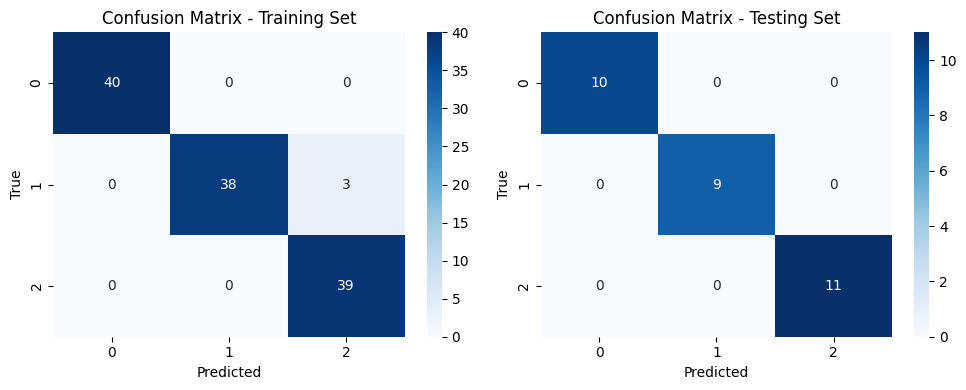

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)

# Calculate the confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot the confusion matrix for the testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

train data accuracy was  1.0
test data accuracy was  1.0


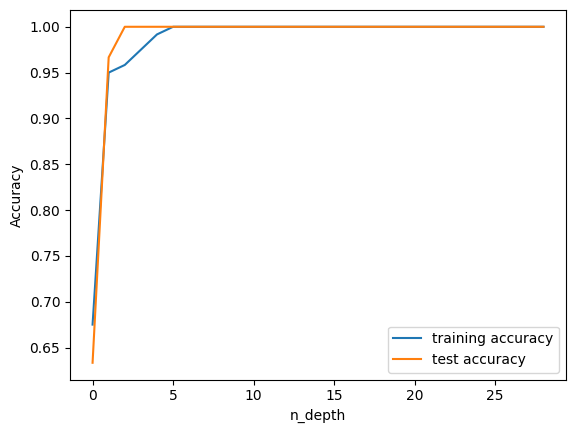

In [61]:
# Modelling DecisionTreeClassifier for iris data_model

from sklearn.tree import DecisionTreeClassifier
data_model = DecisionTreeClassifier(max_depth=10)

data_model.fit(X_train,y_train)

print("train data accuracy was ", data_model.score(X_train, y_train))
print("test data accuracy was ", data_model.score(X_test, y_test))

max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
  data_model = DecisionTreeClassifier(max_depth= depth)
  data_model.fit(X_train, y_train)
  test.append(data_model.score(X_test,y_test))
  train.append(data_model.score(X_train,y_train))

plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

train data accuracy was  0.95
test data accuracy was  0.9666666666666667


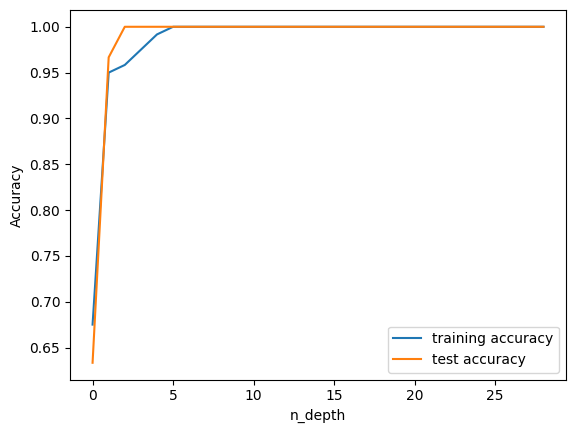

In [62]:
data_model = DecisionTreeClassifier(max_depth=2)

data_model.fit(X_train,y_train)

print("train data accuracy was ", data_model.score(X_train, y_train))
print("test data accuracy was ", data_model.score(X_test, y_test))

max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
  data_model = DecisionTreeClassifier(max_depth= depth)
  data_model.fit(X_train, y_train)
  test.append(data_model.score(X_test,y_test))
  train.append(data_model.score(X_train,y_train))

plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [64]:
from sklearn.svm import LinearSVC
data_model = LinearSVC()

from sklearn.svm import LinearSVC

data_model.fit(X_train, y_train)

print(f"The train data's accuracy was {data_model.score(X_train, y_train)}.")
print(f"The test data's accuracy was {data_model.score(X_test, y_test)}.")

The train data's accuracy was 0.975.
The test data's accuracy was 1.0.


In [67]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

data_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
data_model.fit(X_train,y_train)
data_model.score(X_test,y_test)


0.9927437767973103